In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# data gathering

In [3]:
unemployment=pd.read_csv('archive/unemployment.csv')
unemployment

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
0,1007,AL,"Bibb County, AL",1.0,1.0,City,1.0,"8,623","8,160",463,...,"8,639","8,371",268,3.1,"8,640","8,067",573,6.6,"47,918",92.6
1,1009,AL,"Blount County, AL",1.0,1.0,City,1.0,"25,266","24,375",891,...,"25,196","24,516",680,2.7,"24,661","23,653","1,008",4.1,"52,902",102.2
2,1021,AL,"Chilton County, AL",1.0,1.0,City,1.0,"19,601","18,752",849,...,"19,841","19,296",545,2.7,"19,592","18,618",974,5.0,"49,692",96.0
3,1073,AL,"Jefferson County, AL",1.0,1.0,City,1.0,"331,141","317,868","13,273",...,"316,802","307,648","9,154",2.9,"315,957","296,282","19,675",6.2,"54,127",104.6
4,1115,AL,"St. Clair County, AL",1.0,1.0,City,1.0,"31,555","30,359","1,196",...,"40,698","39,591","1,107",2.7,"40,132","38,146","1,986",4.9,"65,403",126.3
5,1117,AL,"Shelby County, AL",1.0,1.0,City,1.0,"82,798","80,512","2,286",...,"116,412","113,842","2,570",2.2,"114,048","109,646","4,402",3.9,"77,801",150.3
6,1127,AL,"Walker County, AL",1.0,1.0,City,1.0,"31,714","29,851","1,863",...,"25,148","24,311",837,3.3,"24,877","23,431","1,446",5.8,"45,991",88.8
7,4013,AZ,"Maricopa County, AZ",1.0,1.0,City,1.0,"1,598,523","1,546,575","51,948",...,"2,298,810","2,202,716","96,094",4.2,"2,331,628","2,159,267","172,361",7.4,"68,634",110.7
8,4021,AZ,"Pinal County, AZ",1.0,1.0,City,1.0,"69,640","66,458","3,182",...,"189,834","180,277","9,557",5.0,"191,074","176,674","14,400",7.5,"62,067",100.1
9,5035,AR,"Crittenden County, AR",1.0,1.0,City,1.0,"21,967","21,071",896,...,"21,242","20,341",901,4.2,"21,209","19,459","1,750",8.3,"41,976",85.6


# checking data quality

In [4]:
nullCount=unemployment.isnull().sum().sum()
nullCount

1090

In [5]:
dfSize=unemployment.size
dfSize

304575

In [6]:
nullPercentage=100*nullCount/dfSize
nullPercentage

0.35787572847410326

In [7]:
##calculating the null values in each column
nulls=unemployment.isnull().sum()
nulls

FIPS_Code                                     0
State                                         0
Area_name                                     0
Rural_urban_continuum_code_2013              56
Urban_influence_code_2013                    56
City/Suburb/Town/Rural                       56
Metro_2013                                   53
Civilian_labor_force_2000                     5
Employed_2000                                 5
Unemployed_2000                               5
Unemployment_rate_2000                        5
Civilian_labor_force_2001                     5
Employed_2001                                 5
Unemployed_2001                               5
Unemployment_rate_2001                        5
Civilian_labor_force_2002                     5
Employed_2002                                 5
Unemployed_2002                               5
Unemployment_rate_2002                        5
Civilian_labor_force_2003                     5
Employed_2003                           

In [8]:
##checking constraint 
count=0
for i in unemployment['Unemployment_rate_2019']:
    if (i>100):
        count=count+1
print(count)

0


In [9]:
##checking the data types 
unemployment.dtypes

FIPS_Code                                      int64
State                                         object
Area_name                                     object
Rural_urban_continuum_code_2013              float64
Urban_influence_code_2013                    float64
City/Suburb/Town/Rural                        object
Metro_2013                                   float64
Civilian_labor_force_2000                     object
Employed_2000                                 object
Unemployed_2000                               object
Unemployment_rate_2000                       float64
Civilian_labor_force_2001                     object
Employed_2001                                 object
Unemployed_2001                               object
Unemployment_rate_2001                       float64
Civilian_labor_force_2002                     object
Employed_2002                                 object
Unemployed_2002                               object
Unemployment_rate_2002                       f

In [10]:
##removing commas and converting the column into a float
uniTest=unemployment['Unemployed_2018']
tst1=uniTest.replace(',','',regex=True)
tst1.astype(float)

0          340.0
1          874.0
2          704.0
3        11627.0
4         1386.0
5         3227.0
6         1057.0
7        91761.0
8         8993.0
9          912.0
10       25794.0
11       18086.0
12        3324.0
13      236971.0
14        3420.0
15       48066.0
16        5967.0
17       48634.0
18       27409.0
19        1592.0
20       39391.0
21       53393.0
22       13699.0
23       10145.0
24       27682.0
25        4646.0
26        8618.0
27       10701.0
28        1069.0
29         168.0
          ...   
3245    204839.0
3246     92427.0
3247     62905.0
3248     98179.0
3249     19955.0
3250     29275.0
3251     66005.0
3252     20215.0
3253    177163.0
3254     46839.0
3255    389602.0
3256    200675.0
3257     10054.0
3258    260895.0
3259     59967.0
3260     83689.0
3261    286196.0
3262     22701.0
3263     78442.0
3264     13228.0
3265    113017.0
3266    537970.0
3267     45921.0
3268      9113.0
3269    128406.0
3270    166603.0
3271     41204.0
3272     93731

In [11]:
##checking if there is any duplicated value in the primary key
duplicateCheck=unemployment[unemployment.duplicated('FIPS_Code')]
duplicateCheck

,FIPS_Code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,City/Suburb/Town/Rural,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,...,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019


# data preparation

In [12]:
## selecting columns 
df1=unemployment[['City/Suburb/Town/Rural','Unemployment_rate_2003','Unemployment_rate_2005','Unemployment_rate_2007']]
df1

,City/Suburb/Town/Rural,Unemployment_rate_2003,Unemployment_rate_2005,Unemployment_rate_2007
0,City,5.9,4.4,4.2
1,City,4.6,3.6,3.2
2,City,5.0,3.9,3.5
3,City,5.5,4.4,3.9
4,City,5.2,3.9,3.5
5,City,3.5,3.1,2.7
6,City,6.4,4.4,4.4
7,City,5.2,4.0,3.2
8,City,7.0,5.6,4.5
9,City,6.6,6.6,6.6


In [13]:
## dropping the null values
df2=df1.dropna()
df2

,City/Suburb/Town/Rural,Unemployment_rate_2003,Unemployment_rate_2005,Unemployment_rate_2007
0,City,5.9,4.4,4.2
1,City,4.6,3.6,3.2
2,City,5.0,3.9,3.5
3,City,5.5,4.4,3.9
4,City,5.2,3.9,3.5
5,City,3.5,3.1,2.7
6,City,6.4,4.4,4.4
7,City,5.2,4.0,3.2
8,City,7.0,5.6,4.5
9,City,6.6,6.6,6.6


# analyzing

In [14]:
## aggregating
pvTable=df2.pivot_table(index=['City/Suburb/Town/Rural'], aggfunc=np.mean)
pvTable

,Unemployment_rate_2003,Unemployment_rate_2005,Unemployment_rate_2007
City/Suburb/Town/Rural,,,
City,6.183374,5.617848,5.088427
Rural,6.110303,5.631616,5.040101
Suburb,6.620690,6.020159,5.409284
Town,6.272268,5.647961,5.092985


# visualizing

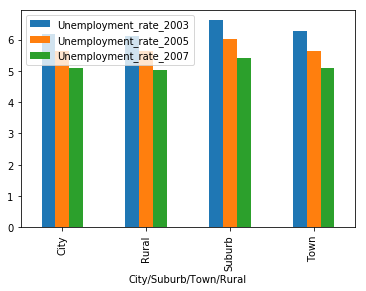

In [15]:
pvTable.plot.bar()

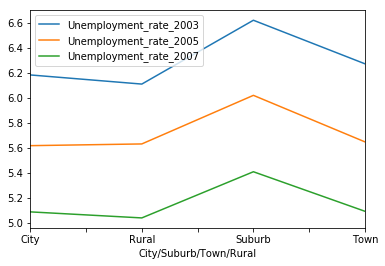

In [16]:
pvTable.plot()

In [17]:
df3=pvTable.reset_index()
df3

,City/Suburb/Town/Rural,Unemployment_rate_2003,Unemployment_rate_2005,Unemployment_rate_2007
0,City,6.183374,5.617848,5.088427
1,Rural,6.110303,5.631616,5.040101
2,Suburb,6.620690,6.020159,5.409284
3,Town,6.272268,5.647961,5.092985


In [18]:
##calculating the correlation
relation=scipy.stats.spearmanr(df3['City/Suburb/Town/Rural'],df3['Unemployment_rate_2003'])
relation

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.60000000000000009, pvalue=0.39999999999999991)

In [19]:
##calculating the correlation
relation2=scipy.stats.spearmanr(df3['City/Suburb/Town/Rural'],df3['Unemployment_rate_2005'])
relation2

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.79999999999999993, pvalue=0.20000000000000007)

In [20]:
##calculating the correlation
relation3=scipy.stats.spearmanr(df3['City/Suburb/Town/Rural'],df3['Unemployment_rate_2007'])
relation3

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.60000000000000009, pvalue=0.39999999999999991)

In [21]:
##calculating the correlation
relation4=scipy.stats.spearmanr(df3['Unemployment_rate_2003'],df3['Unemployment_rate_2005'])
relation4

SpearmanrResult(correlation=0.79999999999999993, pvalue=0.20000000000000007)

In [22]:
##calculating the correlation
relation5=scipy.stats.spearmanr(df3['Unemployment_rate_2005'],df3['Unemployment_rate_2007'])
relation5

SpearmanrResult(correlation=0.79999999999999993, pvalue=0.20000000000000007)